In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data = pd.read_csv('/content/drive/MyDrive/bangladesh_student/Depression_student2_modified.csv')
data.head()

,1. Age,3. University,4. Department,6. Current CGPA,"1. In a semester, how often have you had little interest or pleasure in doing things?","2. In a semester, how often have you been feeling down, depressed or hopeless?","3. In a semester, how often have you had trouble falling or staying asleep, or sleeping too much?","4. In a semester, how often have you been feeling tired or having little energy?","5. In a semester, how often have you had poor appetite or overeating?","6. In a semester, how often have you been feeling bad about yourself - or that you are a failure or have let yourself or your family down?",...,"9. In a semester, how often have you had thoughts that you would be better off dead, or of hurting yourself?",Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression,2. Gender_Female,2. Gender_Male,2. Gender_Prefer not to say,5. Academic Year_First Year or Equivalent,5. Academic Year_Fourth Year or Equivalent,5. Academic Year_Other,5. Academic Year_Second Year or Equivalent,5. Academic Year_Third Year or Equivalent
0,1,8,2,1,1,2,1,1,2,1,...,1,3,1,0,0,0,1,0,0,0
1,1,8,2,4,1,1,1,1,1,1,...,1,2,0,1,0,1,0,0,0,0
2,1,8,2,2,2,0,2,3,2,2,...,1,4,0,1,0,1,0,0,0,0
3,1,8,2,3,1,1,1,1,1,1,...,1,2,0,1,0,1,0,0,0,0
4,1,8,2,3,1,1,1,1,1,1,...,1,2,0,1,0,1,0,0,0,0


In [22]:
import pandas as pd

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/bangladesh_student/Depression_student2_modified.csv")

# Drop the 'Abundance' column from the DataFrame to create the feature matrix X
X = data.drop('Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression', axis=1)

# Extract the 'Abundance' column as the target variable y
y = data['Depression Level:\n1-4 Minimal depression\n5-9 Mild depression\n10-14 Moderate depression\n15-19 Moderately severe depression\n20-27 Severe depression']

# Print the feature matrix X and target variable y
print(X)
print(y)


      1. Age  3. University  4. Department  6. Current CGPA  \
0          1              8              2                1   
1          1              8              2                4   
2          1              8              2                2   
3          1              8              2                3   
4          1              8              2                3   
...      ...            ...            ...              ...   
1972       2              2              0                3   
1973       2              2             10                3   
1974       2              2              0                4   
1975       2              2             10                2   
1976       2              8              2                1   

      1. In a semester, how often have you had little interest or pleasure in doing things?   \
0                                                     1                                        
1                                                  

In [23]:
from sklearn.model_selection import train_test_split
# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Accuracy: 0.9722222222222222
Weighted Precision: 0.9719996966175566
Micro Precision: 0.9722222222222222
Macro Precision: 0.9116563868776257
Precision per class: [0.72727273 0.81818182 0.93333333 1.         0.99115044 1.        ]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.82      0.56      0.67        16
           2       0.93      0.99      0.96        71
           3       1.00      0.99      0.99        95
           4       0.99      1.00      1.00       112
           5       1.00      0.99      0.99        93

    accuracy                           0.97       396
   macro avg       0.91      0.90      0.90       396
weighted avg       0.97      0.97      0.97       396



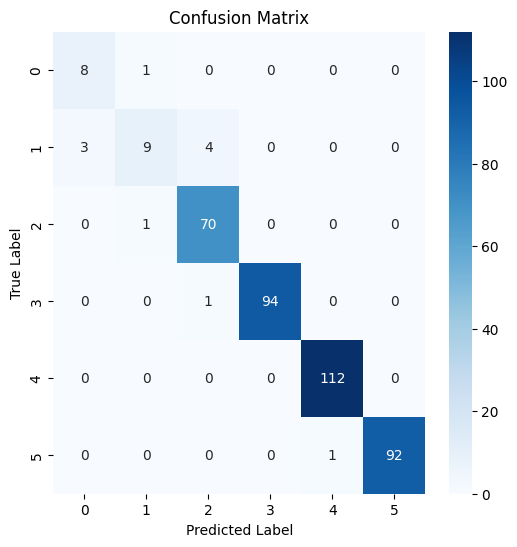

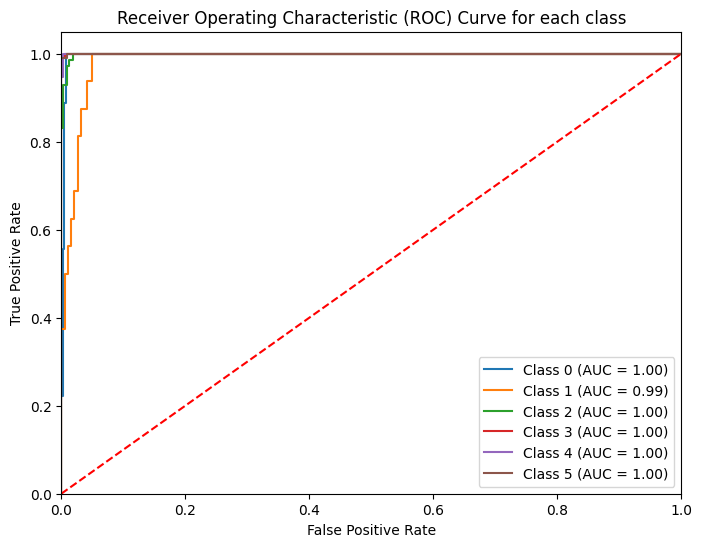

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, f1_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



# Initialize the logistic regression classifier
logistic_classifier = LogisticRegression(max_iter=1000, C=2.0)

# Define the custom equation coefficients
beta_a0 = -2.0  # Intercept
beta_a1 = 0.5   # Coefficient for the feature X

# Train the model
logistic_classifier.fit(X_train, y_train)

# Model testing and evaluation
y_pred = logistic_classifier.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision_weighted = precision_score(y_test, y_pred, average='weighted')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_per_class = precision_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy)
print("Weighted Precision:", precision_weighted)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Precision per class:", precision_per_class)

# Generate and plot classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Plot Confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC for each class
y_pred_probs = logistic_classifier.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming your classes are encoded as integers starting from 0
classes = np.unique(y_test)

for i, class_label in enumerate(classes):
    y_true_binary = (y_test == class_label).astype(int)
    y_score = y_pred_probs[:, i]

    # Calculate ROC curve for the current class
    fpr[class_label], tpr[class_label], _ = roc_curve(y_true_binary, y_score)

    # Calculate AUC for the current class
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f'Class {class_label} (AUC = %0.2f)' % roc_auc[class_label])

plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()


In [25]:
!pip install shapash


In [26]:
from shapash.explainer.smart_explainer import SmartExplainer


In [27]:
from shapash.explainer.smart_explainer import SmartExplainer

# Initialize SmartExplainer
xpl = SmartExplainer(
    model=logistic_classifier,
    preprocessing=None,  # Use None if you don't have specific preprocessing steps
    features_dict=None,  # Optional: dictionary specifying feature names
    label_dict=None      # Optional: dictionary specifying label names
)


In [28]:
# Assuming Xtest is your test data
xpl.compile(x=X_test)


INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [01:04,  5.07it/s]                         


In [30]:
# Use Shapash to explain the predictions
xpl_classifier = SmartExplainer(
    model=logistic_classifier,
    preprocessing=None,  # If you have any preprocessing steps, include them here
    features_dict={i: col for i, col in enumerate(X.columns)}  # Create a dictionary for feature names
)

xpl_classifier.compile(x=X_test, y_target=y_test)

# Generate the scatter plot for prediction explanations
xpl_classifier.plot.scatter_plot_prediction()

INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:33,  9.34it/s]


In [31]:
# Use Shapash to explain the predictions
features_dict = {i: col for i, col in enumerate(X.columns)}

xpl_classifier = SmartExplainer(
    model=logistic_classifier,
    preprocessing=None,  # If you have any preprocessing steps, include them here
    features_dict=features_dict  # Create a dictionary for feature names
)

xpl_classifier.compile(x=X_test, y_target=y_test)

# Generate the scatter plot for prediction explanations
xpl_classifier.plot.scatter_plot_prediction()

INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:36,  9.08it/s]


In [39]:
# Assuming you've already imported necessary libraries and defined your X_test and y_test

from shapash.explainer.smart_explainer import SmartExplainer

# Assuming logistic_classifier is your trained logistic regression model
xpl_classifier = SmartExplainer(
    model=logistic_classifier,
    preprocessing=None,  # If you have any preprocessing steps, include them here
    features_dict=features_dict  # Create a dictionary for feature names
)

# Compile the explainer with test data
xpl_classifier.compile(x=X_test, y_target=y_test)

# Generate the scatter plot for prediction explanations
xpl_classifier.plot.scatter_plot_prediction()


INFO: Shap explainer type - shap.explainers.PermutationExplainer()


PermutationExplainer explainer: 397it [00:30,  9.40it/s]
